## Deciphering Salary Dynamics

In this project, we aim to investigate the multifaceted aspects that contribute to an individual's salary. We consider a variety of factors, including **Age (A)**, **Years of Experience (Y)**, **Education Level (E)**, and **Gender (G)**, to understand their respective impacts on an individual's earnings. 

The Directed Acyclic Graph (DAG) included in this analysis provides a visual representation of the assumed causal relationships between these factors and the salary (S). Our goal is to quantify the direct and indirect effects of each variable on salary, while controlling for potential confounding variables. 

This project is conducted in the context of the course **Foundations of Data Science** under the guidance of **Prof. Darryl Reeves**. Our team comprises:

- *Abhishek Srikumar*: Bringing analytical expertise and a knack for model interpretation.
- *Swetha Jagadeesan*: Focused on model building and statistical analysis.
- *Sivakumar Sankareswaran*: Specializing in data preprocessing and visualization.

Our methodology is rooted in Bayesian statistics, allowing us to incorporate prior knowledge and uncertainty into our models. We employ PyMC for Bayesian inference, constructing a probabilistic model to infer the posterior distributions of our parameters of interest.

Throughout this project, we will iterate over our model, refine our assumptions, and validate our findings, aiming to provide robust insights into the determinants of salary.

### Directed Acyclic Graph(DAG)

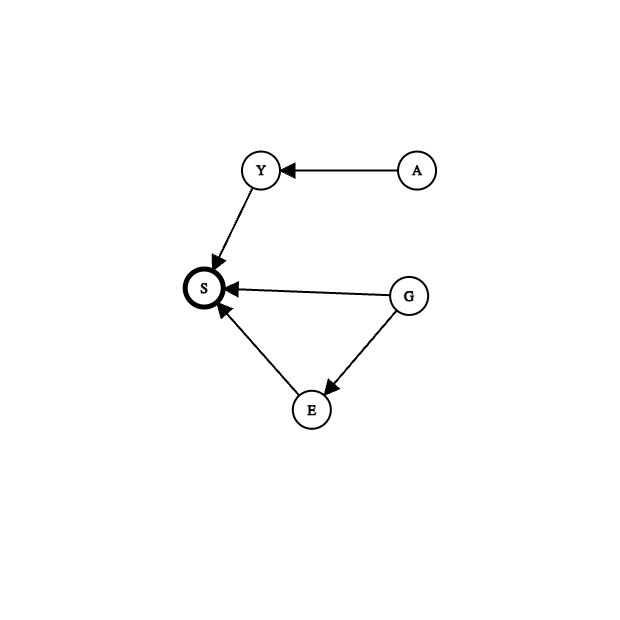

# Statistical Exploration

In our statistical exploration, we've constructed Bayesian hierarchical models to analyze the determinants of salary. These models consider age, years of experience, education, and gender, leveraging PyMC for Bayesian inference. We've set informative priors based on domain knowledge and used observed data to inform posterior distributions. Through iterative modeling and validation, our analysis seeks to provide a nuanced understanding of the factors that significantly influence salary.
 equitable compensation strategies.

## Age
•⁠  ⁠Prior: $\beta_{age} \sim Lognormal(\mu = 0.2, \sigma = 0.5)$

•⁠  ⁠Model: $Salary = \beta_{age} \times Age + \epsilon$

## Years of Experience (YOE)
•⁠  ⁠Prior: $\beta_{YOE} \sim Lognormal(\mu = 0.5, \sigma = 0.25)$

•⁠  ⁠Model: $Salary = \beta_{YOE} \times YOE + \epsilon$

## Gender
•⁠  ⁠Prior: $\beta_{gender} \sim Normal(\mu = -0.5, \sigma = 0.5)$

•⁠  ⁠Model: $Salary = \beta_{gender} \times Gender + \epsilon$

## Education
•⁠  ⁠Prior: $\beta_{education} \sim Normal(\mu = 0.25, \sigma = 0.5)$

•⁠  ⁠Model: $Salary = \beta_{education} \times Education+ \epsilon$

## Sigma
•⁠  ⁠Prior: $\sigma \sim HalfNormal( \sigma = 0.5)$

Our comprehensive Bayesian analysis indicates that years of experience and education level are particularly significant predictors of salary, with gender also showing a discernible impact. These insights pave the way for a deeper understanding of salary dynamics and inform equitable compensation strategies.

In [1]:
# Importing required libraries
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import arviz as az

### Data Preprocessing

In [2]:
# Loading the dataset
df = pd.read_csv('Data/Salary_data.csv')

In [3]:
# Dropping the Job Title column from the dataframe
salary_data = df.drop('Job Title', axis=1)
salary_data.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,29.0,Male,Master's,3.0,75000.0
3,29.0,Male,Master's,3.0,75000.0
4,41.0,Female,Master's,13.0,80000.0


In [4]:
# Dropping rows with incomplete records
salary_data = salary_data.dropna()
salary_data

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,29.0,Male,Master's,3.0,75000.0
3,29.0,Male,Master's,3.0,75000.0
4,41.0,Female,Master's,13.0,80000.0
...,...,...,...,...,...
2135,32.0,Female,PhD,9.0,145000.0
2136,27.0,Male,Bachelor's,3.0,80000.0
2137,32.0,Female,PhD,9.0,145000.0
2138,27.0,Male,Bachelor's,3.0,80000.0


In [5]:
# Allocating variables for each dataset attribute

Age = salary_data.Age
Gender = salary_data.Gender
Education_Level = salary_data['Education Level']
YOE = salary_data['Years of Experience']
Salary = salary_data.Salary

In [6]:
# One-hot encoding for Gender
Gender = Gender.map({'Male': 0, 'Female': 1})
Gender = Gender.astype(int)
Gender

0       0
1       1
2       0
3       0
4       1
       ..
2135    1
2136    0
2137    1
2138    0
2139    1
Name: Gender, Length: 2139, dtype: int64

In [7]:
# One-hot encoding for Education Level
Education_Level_dummies = pd.get_dummies(Education_Level, drop_first=True)
std_Edu_Level_Master = (Education_Level_dummies["Master's"].astype(np.float64))
std_Edu_Level_PhD = (Education_Level_dummies['PhD'].astype(np.float64))
Education_Level_dummies

,Master's,PhD
0,False,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
2135,False,True
2136,False,False
2137,False,True
2138,False,False


In [8]:
# Standardization function
def standardize(series):
    return (series - series.mean()) / series.std()

In [9]:
# Standardizing Age, YOE and Salary
std_Age = standardize(Age)
std_YOE = standardize(YOE)
std_Sal = standardize(Salary)

## Analyzing the dataset
### Distribution of Salary

count      2139.000000
mean     135964.785414
std       45245.597303
min         579.000000
25%      100000.000000
50%      140000.000000
75%      180000.000000
max      240000.000000
Name: Salary, dtype: float64

/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


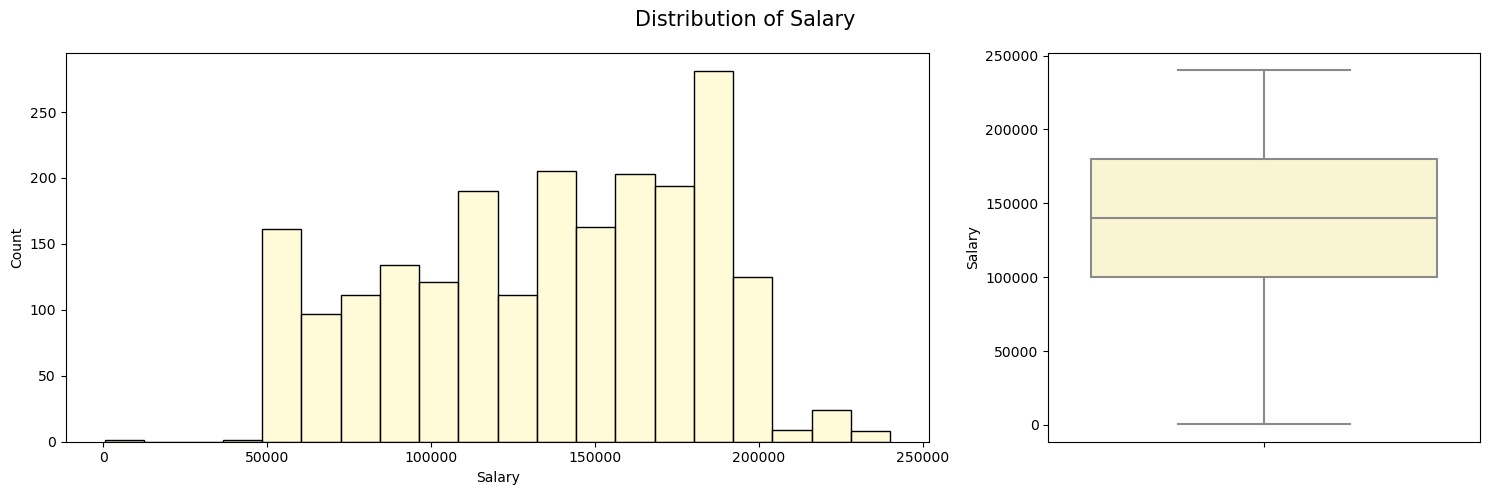

In [10]:
# display the summary statistics
display(salary_data['Salary'].describe())

# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=salary_data, x=salary_data['Salary'], color='lemonchiffon', ax=axes[0])
sns.boxplot(data=salary_data, y=salary_data['Salary'], color='lemonchiffon', ax=axes[1])
figure.suptitle('Distribution of Salary', fontsize=15)
plt.tight_layout()
plt.show()

### Inference:
--> The dataset contains 2,139 salary observations with a mean salary of approximately 135,965 and a standard deviation of about 45,246, indicating variability in the salary range.

--> The salary distribution is right-skewed, as shown by the median being higher than the mean, and most salaries are concentrated between 100,000 to 180,000.

--> The lowest reported salary is unusually low at 579, which could be an outlier or data entry error, while the highest salary is 240,000, not an extreme outlier as per the boxplot.

### Distribution of Education Level

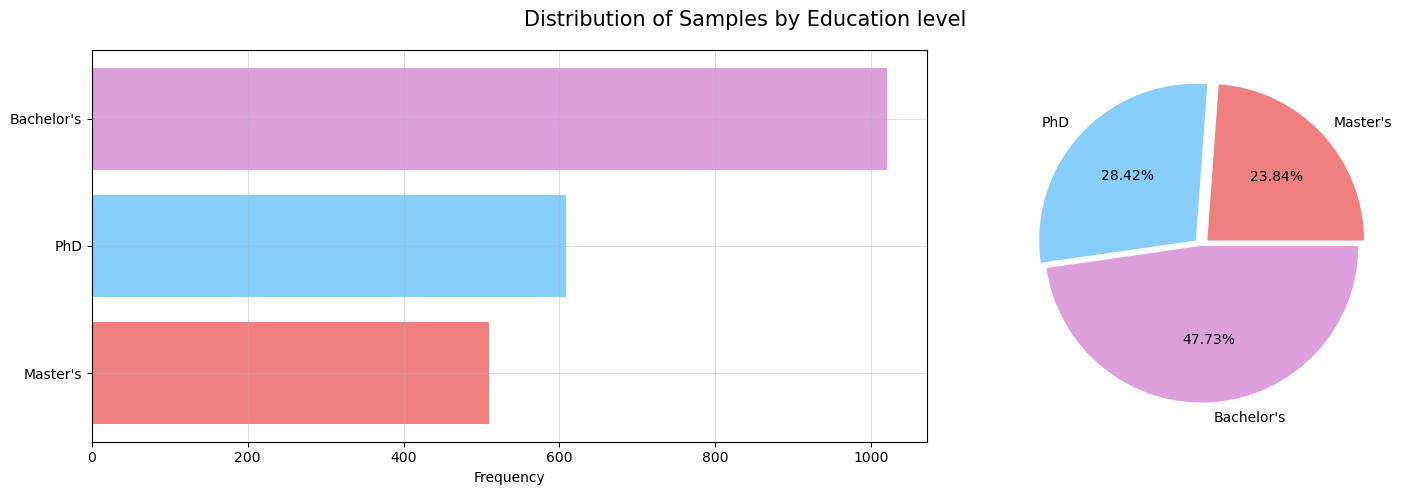

In [11]:
edu = salary_data['Education Level'].value_counts().sort_values()
colors = ['lightcoral','lightskyblue','plum','palegreen']

# visualization (bar chart & pie chart)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=edu.index, width=edu.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].grid(alpha=0.4)
axes[1].pie(edu.values, labels=edu.index, colors=colors, explode=[0.05,0.05,0], autopct='%.2f%%')
figure.suptitle('Distribution of Samples by Education level', fontsize=15)
plt.tight_layout()
plt.show()

#### Distribution of Salary between Male and Female Employees

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,830.0,129869.460241,41200.715027,50000.0,100000.0,136064.5,160000.0,210000.0
Male,1309.0,139829.659282,47242.140491,579.0,95000.0,142000.0,185000.0,240000.0


/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


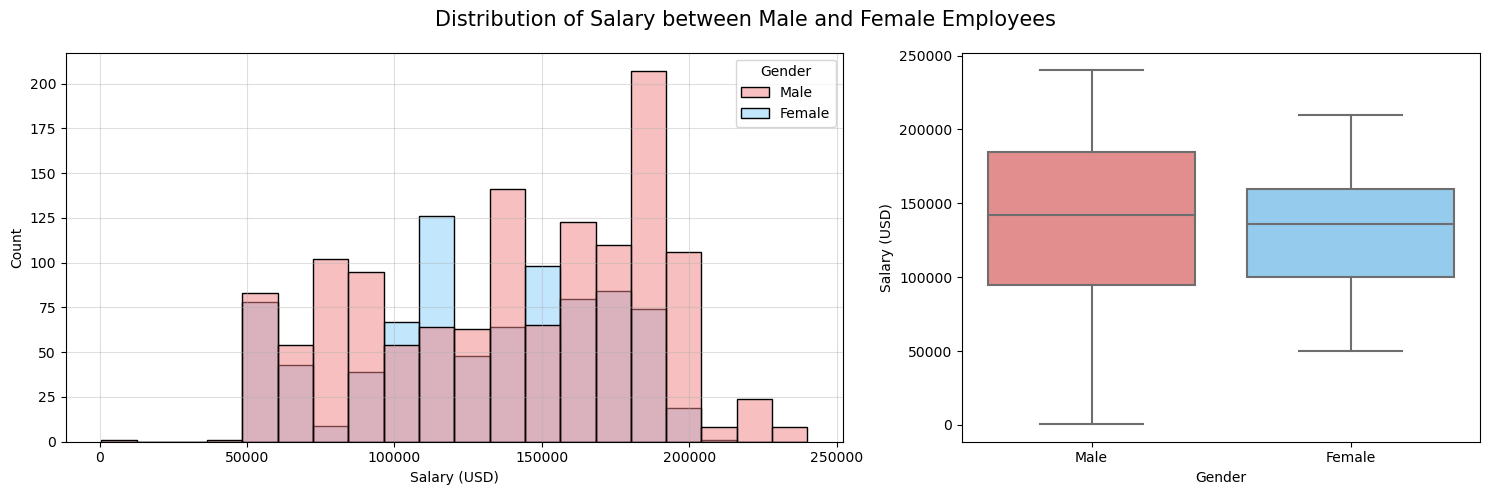

Test statistic:  4.9889
Test p-value:  0.0
There is a statistical significant difference of mean salary between male and female employees.


In [12]:

display(salary_data.groupby('Gender').Salary.describe())

# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=salary_data, x=salary_data['Salary'], hue=salary_data['Gender'], palette=['lightcoral','lightskyblue'], ax=axes[0])
axes[0].set_xlabel('Salary (USD)')
axes[0].grid(alpha=0.4)
sns.boxplot(data=salary_data, x=salary_data['Gender'], y=salary_data['Salary'], palette=['lightcoral','lightskyblue'], ax=axes[1])
axes[1].set_ylabel('Salary (USD)')
figure.suptitle('Distribution of Salary between Male and Female Employees', fontsize=15)
plt.tight_layout()
plt.show()

# perform the independent T-test
male = salary_data[salary_data['Gender']=='Male']
female = salary_data[salary_data['Gender']=='Female']

res = ttest_ind(male['Salary'], female['Salary'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha=0.05
if pvalue < alpha:
    print('There is a statistical significant difference of mean salary between male and female employees.')
else:
    print('There is no enough evidence to conclude a statistical significant difference of the mean salary between male and female employees.')

### Simulating Statistical Model

In [13]:
# Number of samples
n_samples = 1200

# Generating random ages between 18 and 50
np.random.seed(42)
ages = np.random.randint(18, 51, n_samples)

# Assign genders (600 males and 600 females)
genders = np.array(['Male'] * 600 + ['Female'] * 600)

# Shuffle the genders to randomize the distribution
np.random.shuffle(genders)

# Generate years of experience between 0 and 15
years_of_experience = np.random.randint(0, 16, n_samples)

# Education levels (an equal number of bachelors, masters, and PhDs)
education_levels = np.array(['Bachelors', 'Masters', 'PhD'] * (n_samples // 3))

# Ensure that we have exactly n_samples entries by repeating some entries if necessary
extra_entries = n_samples - len(education_levels)
if extra_entries > 0:
    education_levels = np.concatenate((education_levels, education_levels[:extra_entries]))

# Shuffling the education levels to randomize the distribution
np.random.shuffle(education_levels)

simulated_data = np.rec.fromarrays((ages, genders, years_of_experience, education_levels),
                                   names=('Age', 'Gender', 'Years_of_Experience', 'Education_Level'))

simulated_df = pd.DataFrame(simulated_data)
simulated_df.head()


,Age,Gender,Years_of_Experience,Education_Level
0,46,Female,0,PhD
1,32,Male,15,Bachelors
2,25,Male,15,PhD
3,38,Female,6,PhD
4,36,Male,4,PhD


In [14]:
# Simulating salary based on given age, gender, years of experience, and education level.
# We are using arbitrary coefficients for the simulation.

# We'll assume that salary increases linearly with age and years of experience.

# Coefficients for simulation
coeff_age = 1000  # Amount by which salary increases for each year of age.
coeff_yoe = 5000  # Amount by which salary increases for each year of experience.
coeff_gender = {'Male': 0, 'Female': -40000}  # Salary difference due to gender.
coeff_edu_level = {'Bachelors': 0, 'Masters': 20000, 'PhD': 40000}  # Salary difference due to education level.

# Base salary
base_salary = 50000

# Simulate salary
simulated_df['Salary'] = (base_salary +
                          simulated_df['Age'] * coeff_age +
                          simulated_df['Years_of_Experience'] * coeff_yoe +
                          simulated_df['Gender'].map(coeff_gender) +
                          simulated_df['Education_Level'].map(coeff_edu_level))


In [15]:
simulated_df

,Age,Gender,Years_of_Experience,Education_Level,Salary
0,46,Female,0,PhD,96000
1,32,Male,15,Bachelors,157000
2,25,Male,15,PhD,190000
3,38,Female,6,PhD,118000
4,36,Male,4,PhD,146000
...,...,...,...,...,...
1195,29,Male,12,Masters,159000
1196,39,Male,6,Masters,139000
1197,34,Female,12,Bachelors,104000
1198,27,Male,12,Bachelors,137000


/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


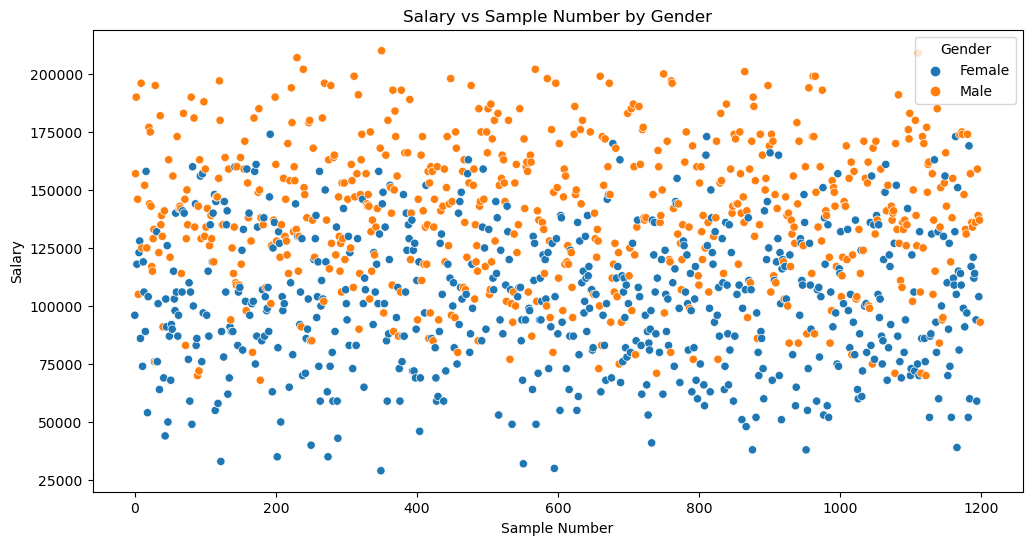

In [16]:
# Plot Salary vs. Sample Number by Gender
plt.figure(figsize=(12, 6))
sns.scatterplot(x=np.arange(n_samples), y=simulated_df['Salary'], hue=simulated_df['Gender'])
plt.title('Salary vs Sample Number by Gender')
plt.xlabel('Sample Number')
plt.ylabel('Salary')
plt.legend(title='Gender')
plt.show()

### Inference
The scatter plot indicates that within this simulated dataset, males tend to have a higher salary range compared to females. The distribution suggests a potential gender pay gap, with male salaries more frequently reaching the upper salary brackets.

/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


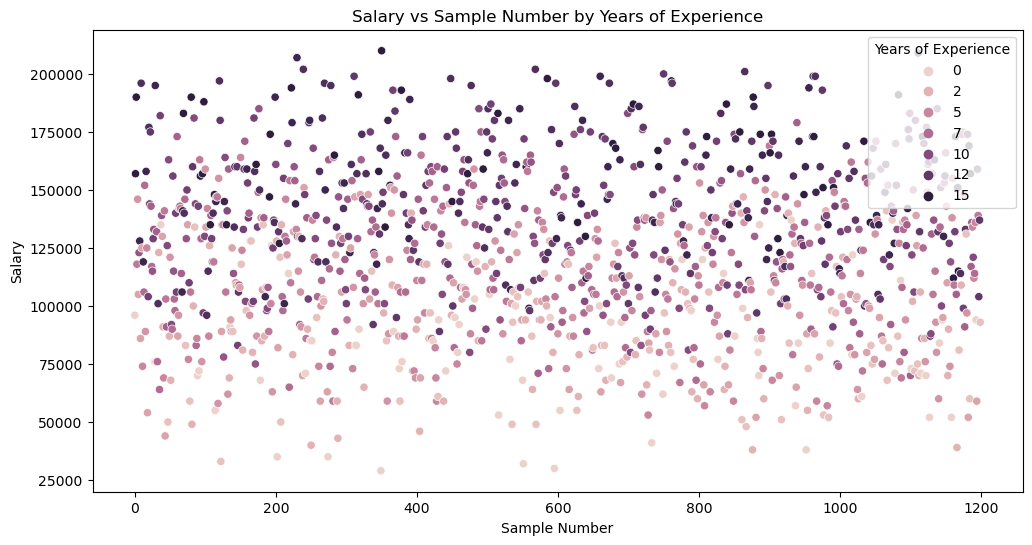

In [17]:
# Plot Salary vs. Sample Number by Years of Experience
plt.figure(figsize=(12, 6))
sns.scatterplot(x=np.arange(n_samples), y=simulated_df['Salary'], hue=simulated_df['Years_of_Experience'])
plt.title('Salary vs Sample Number by Years of Experience')
plt.xlabel('Sample Number')
plt.ylabel('Salary')
plt.legend(title='Years of Experience', loc='upper right')
plt.show()

### Inference
The scatter plot shows salary distribution by years of experience, indicating a general trend of increasing salary with more experience. There is, however, significant overlap in salary ranges among different experience levels, suggesting that years of experience is one of several factors that could influence salary in this simulated dataset.

/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


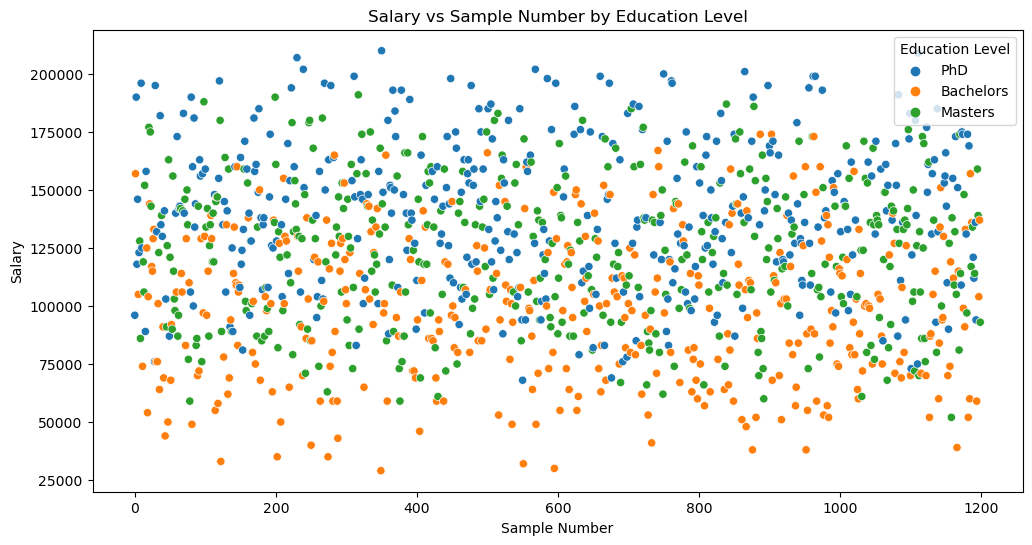

In [18]:
# Plot Salary vs. Sample Number by Education Level
plt.figure(figsize=(12, 6))
sns.scatterplot(x=np.arange(n_samples), y=simulated_df['Salary'], hue=simulated_df['Education_Level'])
plt.title('Salary vs Sample Number by Education Level')
plt.xlabel('Sample Number')
plt.ylabel('Salary')
plt.legend(title='Education Level')
plt.show()

### Inference
The scatter plot demonstrates a trend where individuals with higher educational qualifications, such as PhDs, tend to have higher salaries, with noticeable overlap across education levels. This indicates that while education influences salary in the simulated dataset, other factors may also play a significant role in determining individual salaries.

/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


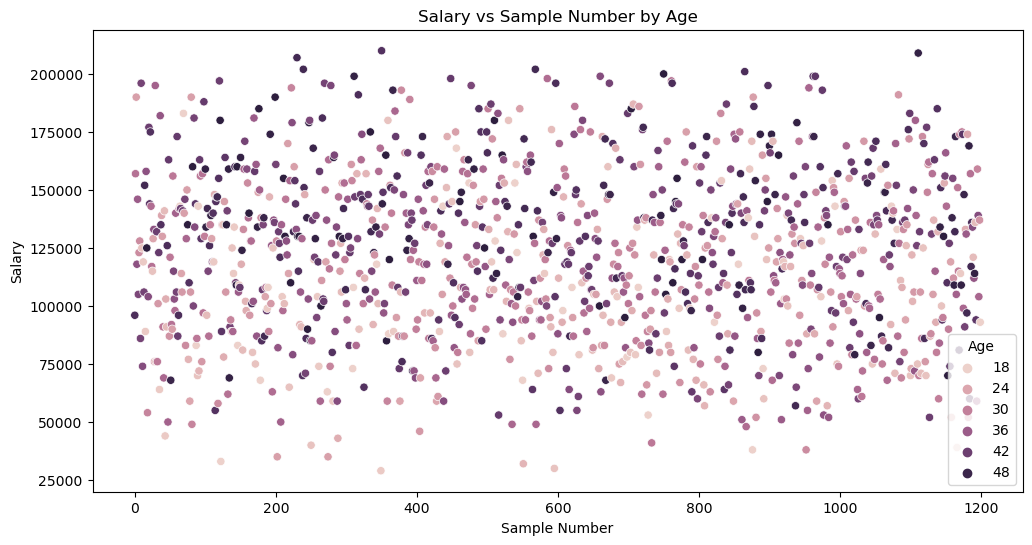

In [19]:
# Plot Salary vs. Sample Number by Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x=np.arange(n_samples), y=simulated_df['Salary'], hue=simulated_df['Age'])
plt.title('Salary vs Sample Number by Age')
plt.xlabel('Sample Number')
plt.ylabel('Salary')
plt.legend(title='Age')
plt.show()

### Inference
The plot displays salary distribution by age across various samples, without a clear trend suggesting that age has a direct linear correlation with salary in this dataset. The wide scatter of salary points at each age level indicates that factors other than age may have a significant influence on salary in this simulated scenario.

### Prior Predictive Simulation

#### The following considerations are made for the priors:
1. The sigma value is 20000 for the intercept and mean of the simulated salary is considered.
2. beta_Age : Assuming each year of age contributes increase in salary by 0.2 with a SD of 0.5.
3. beta_YOE : Assuming each year of experience contributes 0.5 to the salary.
4. beta_Gender: Assuming that women are paid less than men.
5. Education: Assuming that people with masters are paid more than bachelors degree. Also people with PhD are paid more than both bachelors and masters.

In [20]:
with pm.Model() as prior_model:
    # Priors for the regression coefficients
    intercept = pm.Normal('alpha', mu=simulated_df['Salary'].mean(), sigma=20000)
    beta_Age = pm.Lognormal('Beta_Age', mu=0.2, sigma=0.5) 
    beta_YOE = pm.Lognormal('Beta_YOE', mu=0.5, sigma=0.25)
    beta_Gender = pm.Normal('Beta_Gender', mu=-0.5, sigma=0.5)  
    beta_education_levels = pm.Normal('Beta_education', mu=0.25, sigma=0.5)
    
    # Standard deviation of the model
    sigma = pm.HalfNormal('sigma', 0.5)

    # One-hot encoding gender and education
    sim_gender = simulated_df['Gender'].map({'Male': 0, 'Female': 1})
    sim_gender = sim_gender.astype(int)
    sim_education = simulated_df['Education_Level'].astype('category').cat.codes

    # Expected log of outcome using the linear model structure from the DAG
    mu = (intercept + beta_Age * simulated_df['Age'] + 
              beta_YOE * simulated_df['Years_of_Experience'] + 
              beta_Gender * sim_gender + 
              beta_education_levels * sim_education)

    # Likelihood of the observations on the log scale
    Salary_obs = pm.Normal('Salary_obs', mu=mu, sigma=sigma)
    
    # Perform Prior Predictive Checks
    prior_checks = pm.sample_prior_predictive(samples=1000)


Sampling: [Beta_Age, Beta_Gender, Beta_YOE, Beta_education, Salary_obs, alpha, sigma]


/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


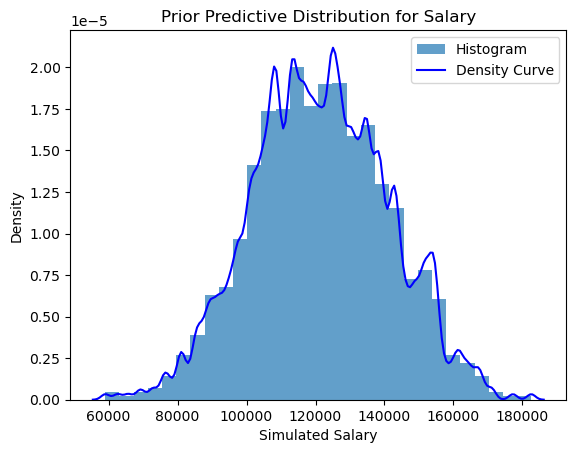

In [21]:
# Analyzing the Prior Predictive Distribution

simulated_salary = prior_checks.prior['Salary_obs'].values
simulated_salary_flat = simulated_salary.flatten()

# Plotting the histogram of the simulated Salary values
plt.hist(simulated_salary_flat, bins=30, alpha=0.7, density=True, label='Histogram')

# Density plot (KDE)
sns.kdeplot(simulated_salary_flat, color='blue', label='Density Curve')

plt.title('Prior Predictive Distribution for Salary')
plt.xlabel('Simulated Salary')
plt.ylabel('Density')
plt.legend()
plt.show()


### Explanation:
--> The graph displays the prior predictive distribution of salaries from a Bayesian model, showing most expected salaries between 80,000 and 160,000, with a right skew indicating fewer high salary predictions.

--> The histogram and overlaid density curve depict the range and frequency of these salaries before observing any real-world data. This visualization helps validate the model's assumptions about the factors influencing salary.

### Building the model

### Gender on Salary - Direct effect

The intercept is defined as mu=0 and sigma=1 implying no strong initial assumption about the starting value of salary.

Female are considered to be paid less than male with beta_gender having mu = -0.5 and sigma=0.5.


In [22]:
# Build the Bayesian model
with pm.Model() as model:
    # Priors for the model parameters
    intercept = pm.Normal('Intercept', mu=0, sigma=1)
    beta_gender = pm.Normal('beta_gender', mu=-0.5, sigma=0.5)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = intercept + beta_gender * Gender

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=std_Sal)

    # Posterior sampling
    Gender_Direct = pm.sample(2000, tune=2000, chains=4)

# Print the summary of the trace
summary = pm.summary(Gender_Direct)
print(summary)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, beta_gender, sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 19 seconds.


              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept    0.086  0.027   0.033    0.135      0.000      0.0    4702.0   
beta_gender -0.221  0.043  -0.306   -0.145      0.001      0.0    5171.0   
sigma        0.995  0.015   0.966    1.023      0.000      0.0    8117.0   

             ess_tail  r_hat  
Intercept      5274.0    1.0  
beta_gender    5540.0    1.0  
sigma          6300.0    1.0  


## Inference

- The expected salary for both males and females is centered around the same value, with the mean salary difference (beta_gender) being -0.222.
- The standard deviation (SD) of the salary is large (0.995), indicating substantial variability within each gender group.
- The 94% Highest Density Interval (HDI) for the gender effect on salary ranges from -0.308 to -0.141, which does not include zero, suggesting a statistically significant difference in salary between genders.
- The r_hat values are 1.0, indicating that the model has converged well, with the bulk and tail effective sample sizes (ess_bulk, ess_tail) being sufficiently large for reliable estimates.



### Gender on Salary - Total effect

beta_gender_s --> This prior indicates an expectation that gender might have a negative effect on salary (mu=-0.5), but there is considerable uncertainty about this effect(sigma =0.5). Assumed that women are paid less than men.

beta_gender_e --> This prior assumes that gender may not have a strong direct effect on education level, as indicated by the mean of 0 and a relatively small standard deviation.

beta_education_s --> An assumption that higher education levels are likely to increase salary, as indicated by the positive mean, but there's significant uncertainty in this effect.

In [23]:
# Reloading the dataset
data = pd.read_csv('Data/Salary_data.csv')

# Convert 'Gender' to a binary variable and encode 'Education Level' as an ordered categorical variable.
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Education Level'] = data['Education Level'].astype('category').cat.codes

# Check for any NaN values and remove them if necessary
data.dropna(inplace=True)

# Defining the Bayesian model
with pm.Model() as model:
    # Priors for the direct effect of Gender on Salary
    intercept_s = pm.Normal('Intercept_S', mu=0, sigma=1)
    beta_gender_s = pm.Normal('Beta_Gender_S', mu=-0.5, sigma=0.5)
    
    # Priors for the effect of Gender on Education Level
    intercept_e = pm.Normal('Intercept_E', mu=0, sigma=1)
    beta_gender_e = pm.Normal('Beta_Gender_E', mu=0, sigma=1)

    # Priors for the effect of Education Level on Salary
    beta_education_s = pm.Normal('Beta_Education_S', mu=0.25, sigma=0.5)
    
    # Model error
    sigma = pm.HalfNormal('Sigma', sigma=10)

    # Expected value of Education Level (mediator)
    mu_e = intercept_e + beta_gender_e * data['Gender']

    # Expected value of Salary (outcome)
    mu_s = intercept_s + beta_gender_s * data['Gender'] + beta_education_s * data['Education Level']
    salary_obs = pm.Normal('Salary_Obs', mu=mu_s, sigma=sigma, observed=std_Sal)

    # Posterior sampling
    Gender_Total = pm.sample(3000, tune=1500, chains=4)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept_S, Beta_Gender_S, Intercept_E, Beta_Gender_E, Beta_Education_S, Sigma]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 50 seconds.


In [24]:
# Summarize the trace to get the total effect
pm.summary(Gender_Total, var_names=['Beta_Gender_S', 'Beta_Gender_E', 'Beta_Education_S'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Beta_Gender_S,-0.227,0.038,-0.297,-0.153,0.000,0.00,13782.0,8466.0,1.0
Beta_Gender_E,-0.006,1.007,-1.912,1.883,0.008,0.01,15190.0,8651.0,1.0
Beta_Education_S,0.611,0.022,0.570,0.652,0.000,0.00,13960.0,9001.0,1.0


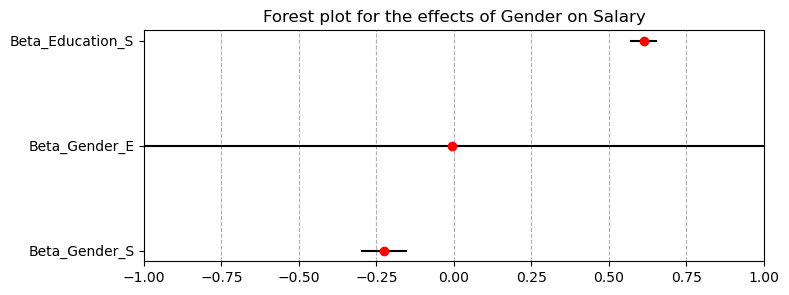

In [25]:
# Flattening the required parameters
beta_gender_s_samples = Gender_Total.posterior['Beta_Gender_S'].values.flatten()
beta_gender_e_samples = Gender_Total.posterior['Beta_Gender_E'].values.flatten()
beta_education_s_samples = Gender_Total.posterior['Beta_Education_S'].values.flatten()

# Calculate the HDIs for each parameter
beta_gender_s_hdi = az.hdi(beta_gender_s_samples)
beta_gender_e_hdi = az.hdi(beta_gender_e_samples)
beta_education_s_hdi = az.hdi(beta_education_s_samples)

# Calculate the means
beta_gender_s_mean = np.mean(beta_gender_s_samples)
beta_gender_e_mean = np.mean(beta_gender_e_samples)
beta_education_s_mean = np.mean(beta_education_s_samples)

# Plotting the forest plot
plt.figure(figsize=(8, 3))

# Define the positions of the means and HDIs
means = [beta_gender_s_mean, beta_gender_e_mean, beta_education_s_mean]
hdis = [beta_gender_s_hdi, beta_gender_e_hdi, beta_education_s_hdi]
labels = ['Beta_Gender_S', 'Beta_Gender_E', 'Beta_Education_S']

# Plotting the means as points and the HDIs as lines
for i, (mean, hdi) in enumerate(zip(means, hdis)):
    plt.plot(hdi, [i, i], color='black')
    plt.plot(mean, i, 'o', color='red')

plt.yticks(range(len(means)), labels)
plt.title('Forest plot for the effects of Gender on Salary')
plt.grid(axis='x', ls='--')
plt.xlim(-1, 1)
plt.show()



### Inference

- The effect of gender on salary (Beta_Gender_S) is negative, with a mean estimate of -0.227, indicating that females are predicted to earn less than males, assuming other factors are held constant.
- The effect of gender on education level (Beta_Gender_E) is close to zero (mean estimate 0.003) with a wide credible interval, suggesting that there's no strong direct effect of gender on education level within this data.
- The positive effect of education level on salary (Beta_Education_S) has a mean estimate of 0.613, indicating that higher education levels are associated with higher salaries.
- The model has converged well, as indicated by the r_hat values of 1.0, and the effective sample sizes (ess_bulk and ess_tail) are large, suggesting reliable estimates from the posterior distribution.

### Direct Effect - Education on Salary

It assumes normal priors for both the intercept and the slope (beta_education) with mean 0 and 0.25 respectively, and a standard deviation of 10, indicating a broad range of plausible values, and a half-normal prior for the model's error term with a standard deviation of 1, assuming that the error term is always positive and could vary significantly.

In [26]:
with pm.Model() as education_salary_model:
    # Priors for the model parameters
    intercept = pm.Normal('Intercept', mu=0, sigma=1)
    beta_education = pm.Normal('Beta_Education', mu=0.25, sigma=0.5)
    
    # Standard deviation of the error
    sigma = pm.HalfNormal('Sigma', sigma=1)

    # Expected value of outcome
    mu = intercept + beta_education * data['Education Level']

    # Likelihood (sampling distribution) of observations
    salary_obs = pm.Normal('Salary_Obs', mu=mu, sigma=sigma, observed=std_Sal)

    # Posterior sampling
    Education_effect = pm.sample(2000, tune=1000, chains=4, return_inferencedata=True)

pm.summary(Education_effect)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, Beta_Education, Sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.493,0.026,-0.543,-0.448,0.0,0.0,4802.0,5540.0,1.0
Beta_Education,0.612,0.022,0.574,0.655,0.0,0.0,4633.0,5206.0,1.0
Sigma,0.855,0.013,0.830,0.878,0.0,0.0,5688.0,6036.0,1.0


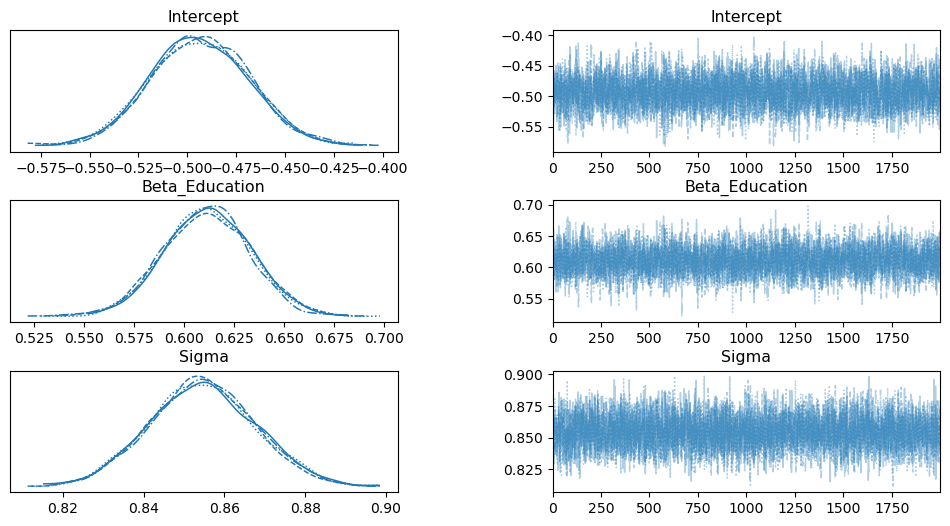

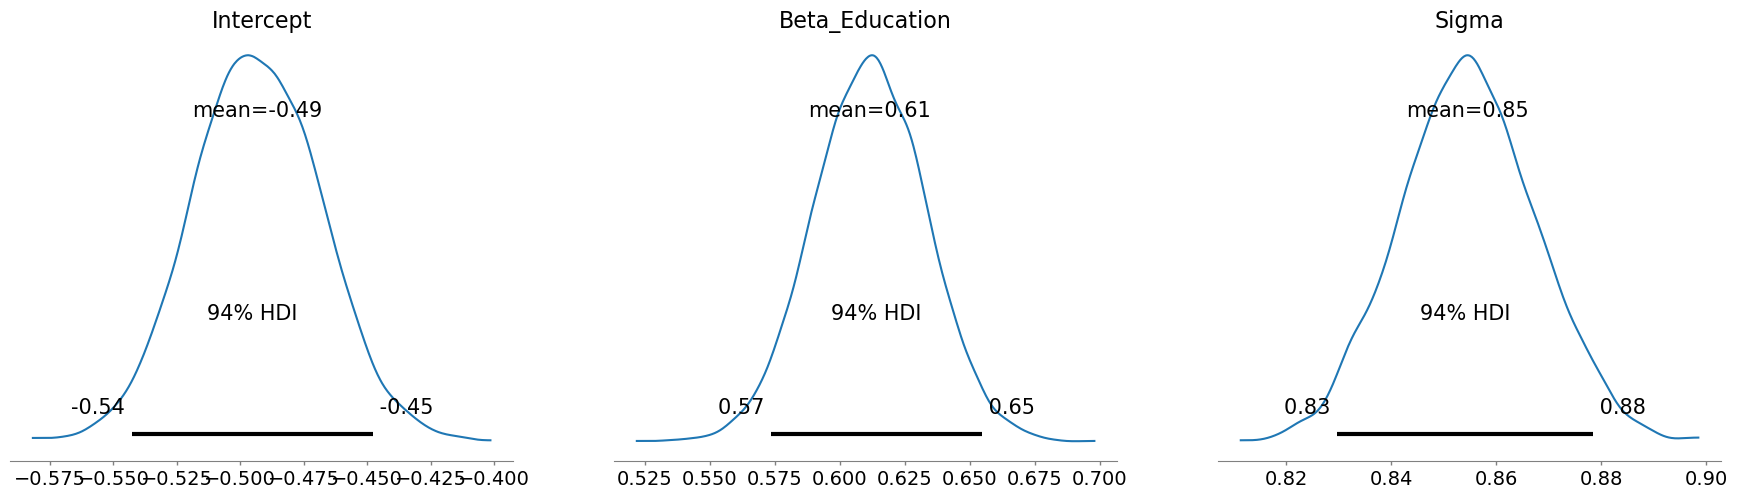

In [27]:
# Trace Plots using ArviZ
az.plot_trace(Education_effect)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

# Posterior Distribution Plots using ArviZ
az.plot_posterior(Education_effect)
plt.show()


### Explanation
- The model includes an intercept (mean estimate -0.493) and a coefficient for education level (mean estimate 0.611), suggesting that salary increases with higher education levels.
- The standard deviation of the salary observations (Sigma) is 0.854, indicating variability in salaries that is not explained by education level alone.
- The highest density intervals (HDI) for both intercept and beta_education are narrow, showing that the estimates are precise and the posterior distribution is concentrated around the mean.
- The model's convergence is good, with r_hat values at 1.0, and the effective sample size for both parameters and sigma is sufficiently large, suggesting that the sampling provides reliable and stable estimates.

### Effect of Years of Experience on Salary

A normal prior for the intercept with a mean of 0 and a standard deviation of 1, and a lognormal prior for the effect of years of experience (beta_experience) on salary with a mean of 0.5 and a standard deviation of 1, indicating a moderate expected positive effect of experience on salary. Additionally, it specifies a half-normal prior for the error term in the model with a standard deviation of 10.

In [28]:
with pm.Model() as experience_salary_model:
    # Priors
    intercept = pm.Normal('Intercept', mu=0, sigma=1)
    beta_experience = pm.Lognormal('Beta_Experience', mu=0.5, sigma=0.25)
    
    # Standard deviation of the error
    sigma = pm.HalfNormal('Sigma', sigma=1)

    # Expected value of outcome
    mu = intercept + beta_experience * std_YOE

    # Likelihood (sampling distribution) of observations
    salary_obs = pm.Normal('Salary_Obs', mu=mu, sigma=sigma, observed=std_Sal)

    YOE_effect = pm.sample(2000, tune=1000, chains=4, return_inferencedata=True)

# Summary statistics for the posterior distribution
summary = pm.summary(YOE_effect)
print(summary)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, Beta_Experience, Sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept        0.000  0.015  -0.028    0.028        0.0      0.0   11834.0   
Beta_Experience  0.717  0.015   0.688    0.746        0.0      0.0   11996.0   
Sigma            0.701  0.011   0.681    0.721        0.0      0.0   12376.0   

                 ess_tail  r_hat  
Intercept          6695.0    1.0  
Beta_Experience    6552.0    1.0  
Sigma              6611.0    1.0  


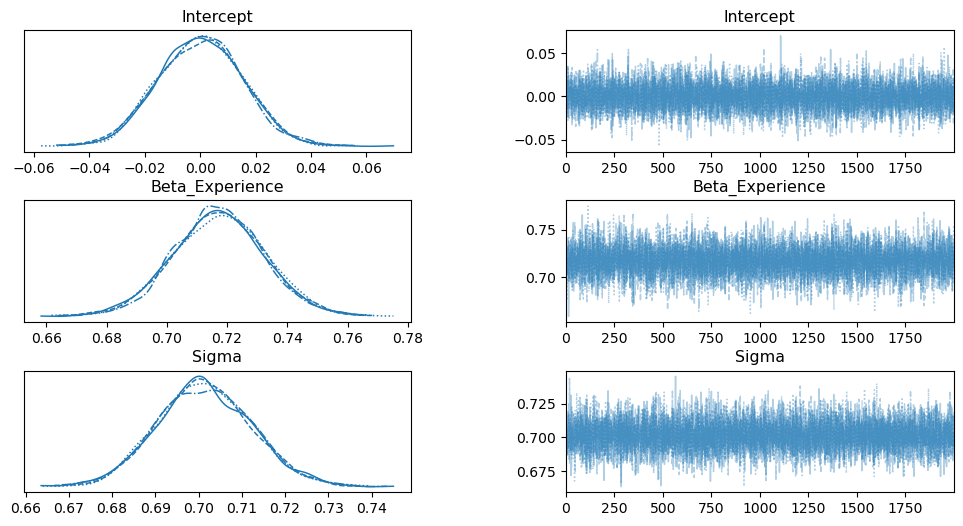

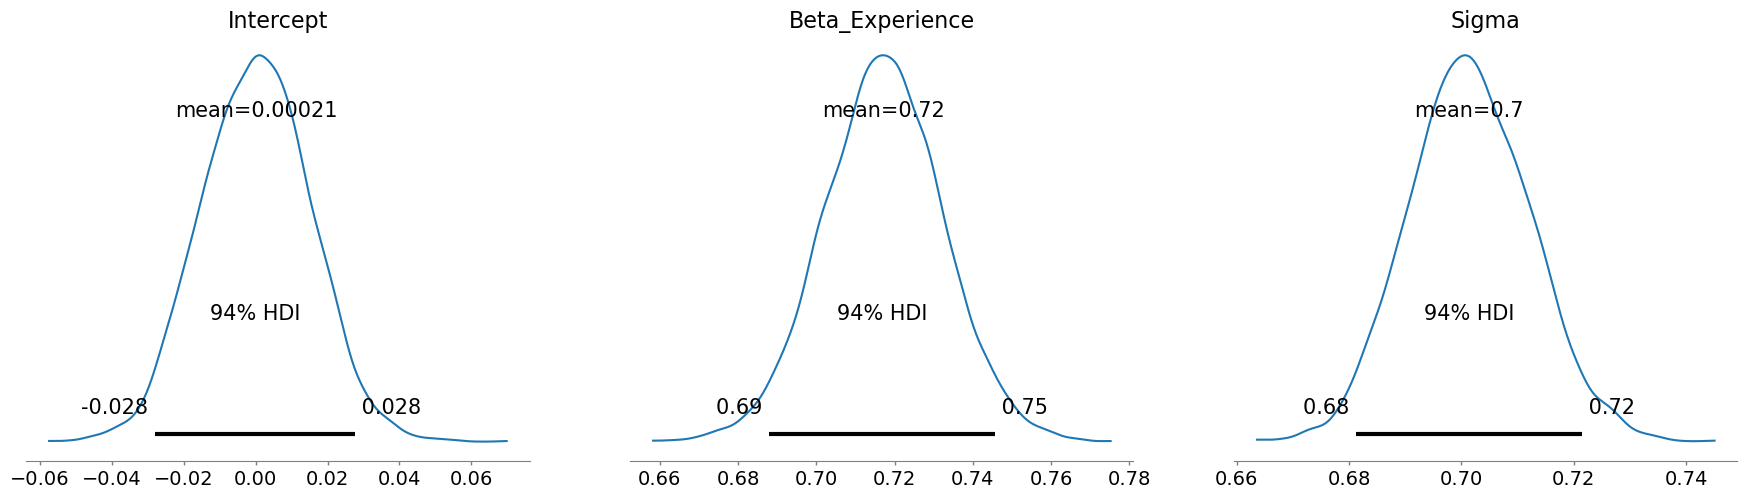

In [29]:
# Trace plots
az.plot_trace(YOE_effect)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

# Posterior distribution plots
az.plot_posterior(YOE_effect)
plt.show()


### Inference
From the summary related to the influence of years of experience on salary, we can draw the following conclusions:

- The `Intercept` is centered at zero (mean estimate 0.000) after standardizing the predictors and response, which is expected as standardizing centers the data around zero.
- The `Beta_Experience` coefficient has a mean estimate of 0.717, indicating a positive relationship between years of experience and salary; as years of experience increase, so does salary.
- The standard deviation (`Sigma`) of the model's residuals is 0.702, suggesting that there is variability in salary that is not explained solely by years of experience.
- The model diagnostics show good convergence with `r_hat` values at 1.0, and effective sample sizes (`ess_bulk` and `ess_tail`) are large, indicating that the posterior estimates are reliable.

### Influence of Age on Salary

The normal priors of intercept and beta_age have a mean of 0 and a standard deviation of 1, indicating no initial bias and a wide range of plausible values. The beta_years_of_experience has a mean of 0.5 and a standard deviation of 1, suggesting an expected positive effect of experience on salary but with significant uncertainty.

In [30]:
# Defining the Bayesian model
with pm.Model() as model:
    # Priors for the model parameters
    intercept = pm.Normal('Intercept', mu=0, sigma=1)
    beta_age = pm.Normal('Beta_Age', mu=0., sigma=1)
    beta_years_of_experience = pm.Normal('Beta_Years_of_Experience', mu=0.5, sigma=0.25)
    
    # Standard deviation of the error
    sigma = pm.HalfNormal('Sigma', sigma=1)

    # Expected value of outcome
    mu = intercept + beta_age * std_Age + beta_years_of_experience * std_YOE

    # Likelihood (sampling distribution) of observations
    salary_obs = pm.Normal('Salary_Obs', mu=mu, sigma=sigma, observed=std_Sal)

    # Posterior sampling with the option to compute log likelihoods for model comparison
    Age_effect = pm.sample(2000, tune=1000, chains=4, return_inferencedata=True)

# Summary statistics for the posterior distribution
summary = pm.summary(Age_effect)
print(summary)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, Beta_Age, Beta_Years_of_Experience, Sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 32 seconds.


                           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept                -0.000  0.015  -0.029    0.029      0.000    0.000   
Beta_Age                  0.069  0.044  -0.012    0.151      0.001    0.001   
Beta_Years_of_Experience  0.647  0.044   0.565    0.728      0.001    0.001   
Sigma                     0.702  0.011   0.682    0.722      0.000    0.000   

                          ess_bulk  ess_tail  r_hat  
Intercept                   6100.0    5098.0    1.0  
Beta_Age                    3748.0    3859.0    1.0  
Beta_Years_of_Experience    3720.0    3768.0    1.0  
Sigma                       5860.0    4735.0    1.0  


array([<Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 'Beta_Age'}>,
       <Axes: title={'center': 'Beta_Years_of_Experience'}>,
       <Axes: title={'center': 'Sigma'}>], dtype=object)

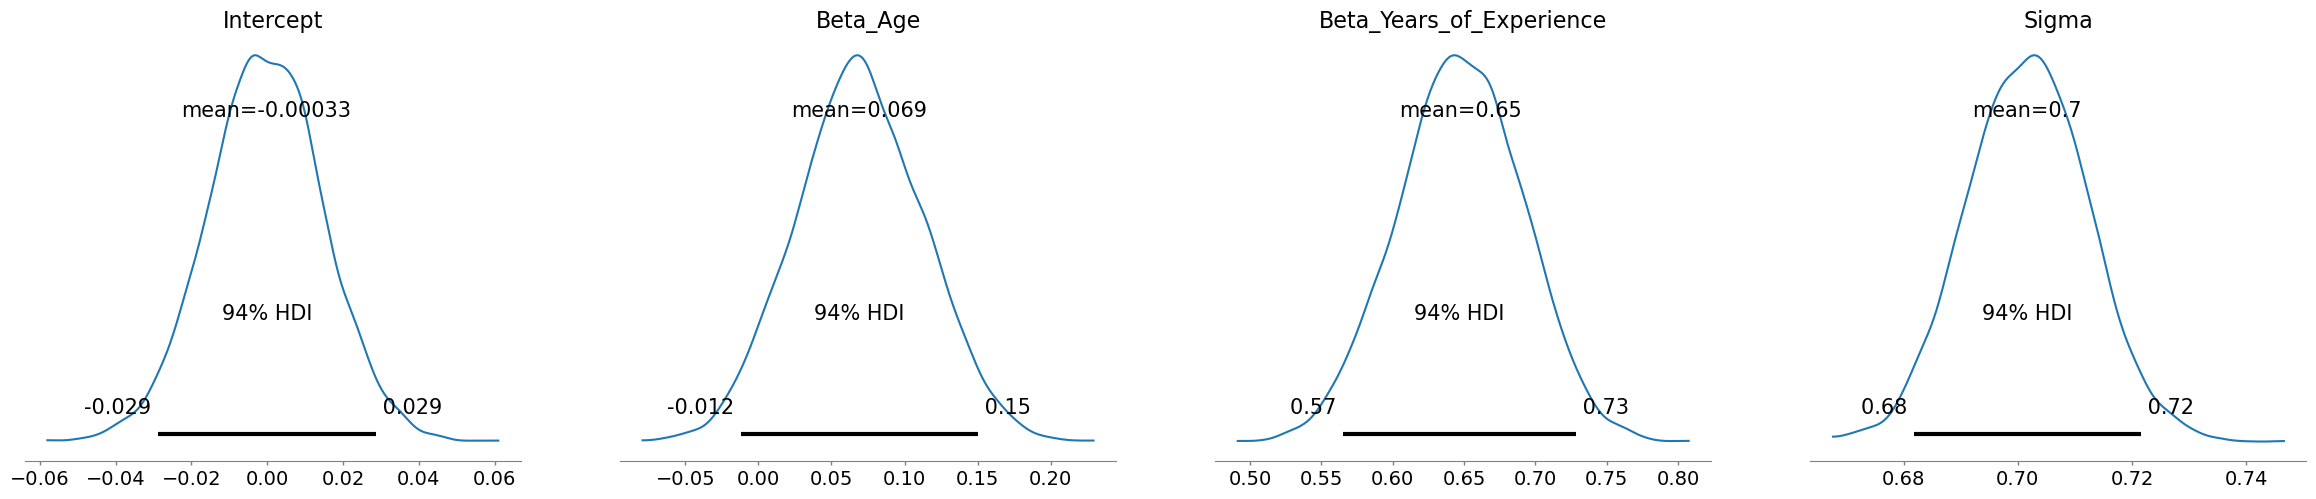

In [31]:
# Posterior distribution plots for each parameter
az.plot_posterior(Age_effect, var_names=['Intercept', 'Beta_Age', 'Beta_Years_of_Experience', 'Sigma'])


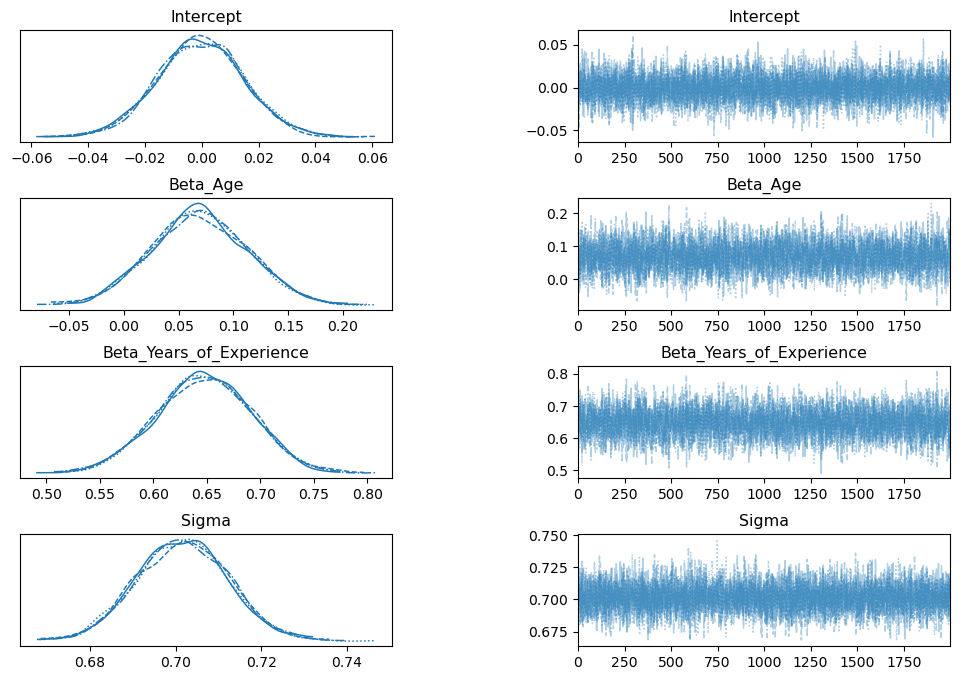

In [32]:
az.plot_trace(Age_effect, var_names=['Intercept', 'Beta_Age', 'Beta_Years_of_Experience', 'Sigma'], figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


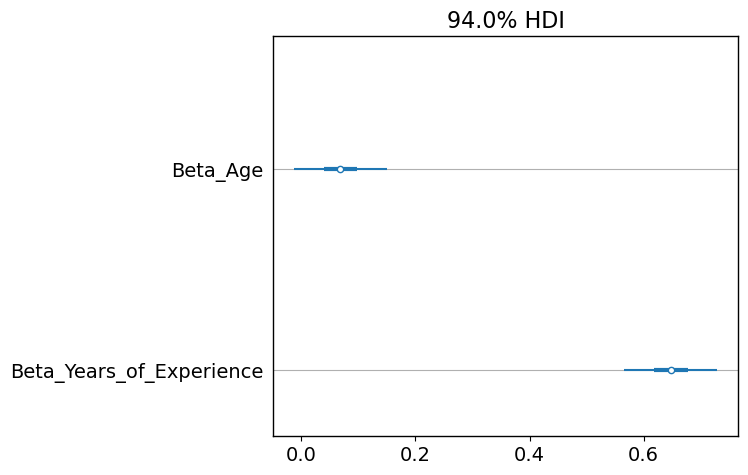

In [33]:
# Generating forest plots
axes = az.plot_forest(Age_effect, var_names=['Beta_Age', 'Beta_Years_of_Experience'], combined=True, hdi_prob=0.94)
for ax in axes:
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)
        
    ax.yaxis.grid(True)

plt.show()


### Inference
The intercept of the model is effectively zero, which aligns with the standardized predictors and outcome.
The Beta_Age coefficient has a mean of 0.064 with a wide credible interval that crosses zero, suggesting that the impact of age on salary is uncertain and potentially not a strong predictor in this model.
The Beta_Years_of_Experience coefficient has a mean of 0.654, indicating a robust positive relationship between years of experience and salary. The credible interval does not cross zero, implying this is a significant predictor.
The Sigma value, representing the standard deviation of the residuals, has a mean of 0.702, which shows that there is still considerable unexplained variability in salary. 

### Conclusion
The forest plot displays the posterior estimates for the effects of age and years of experience on salary. 
The plot shows that the point estimate for the effect of years of experience is notably higher than that for age, and the uncertainty associated with the age effect is larger, spanning both negative and positive values. 
The estimates for years of experience, however, are consistently positive with a narrower confidence interval, indicating more certainty about its positive impact on salary.

### Regression Plots

#### Effect of Gender on Salary

/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

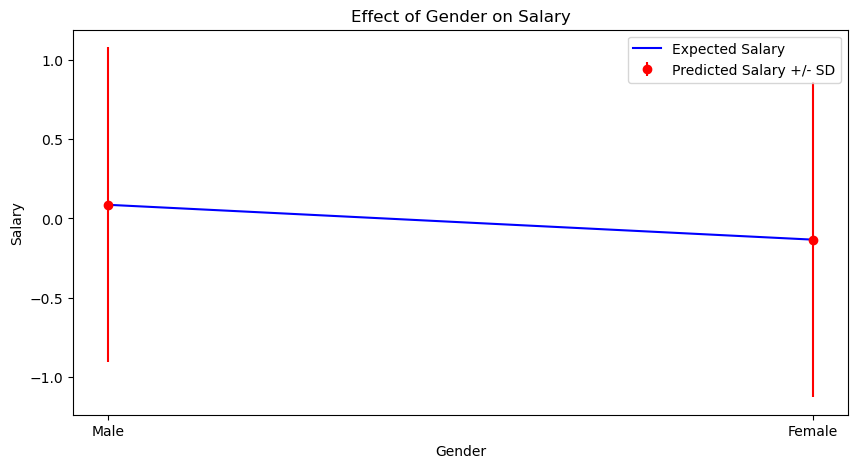

In [34]:
# Extracting the posterior samples
posterior_intercept = 0.086  # mean of the intercept's posterior
posterior_beta_gender = -0.220  # mean of the gender's beta posterior
posterior_sigma = 0.995  # mean of the sigma's posterior

# Simulating observations
gender_categories = np.array([0, 1])  # Male and Female
salary_expectation = posterior_intercept + posterior_beta_gender * gender_categories

# Plotting
plt.figure(figsize=(10, 5))

# Regression line
sns.lineplot(x=gender_categories, y=salary_expectation, color='blue', label='Expected Salary')

# Points for Male (0) and Female (1) with error bars (using posterior_sigma)
plt.errorbar(gender_categories, salary_expectation, yerr=posterior_sigma, fmt='o', color='red', label='Predicted Salary +/- SD')

# Labelling
plt.xticks(ticks=gender_categories, labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Effect of Gender on Salary')
plt.legend()
plt.show()

### Conclusion

- Gender appears to influence salary negatively for females in this dataset, as indicated by the beta_gender coefficient of -0.220, which means females are expected to earn less than males on average when all other factors are held constant.
- The negative value of the gender coefficient suggests that being female is associated with a decrease in salary compared to males, considering the model's parameters.

#### Effect of Education on Salary

/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/fnds/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

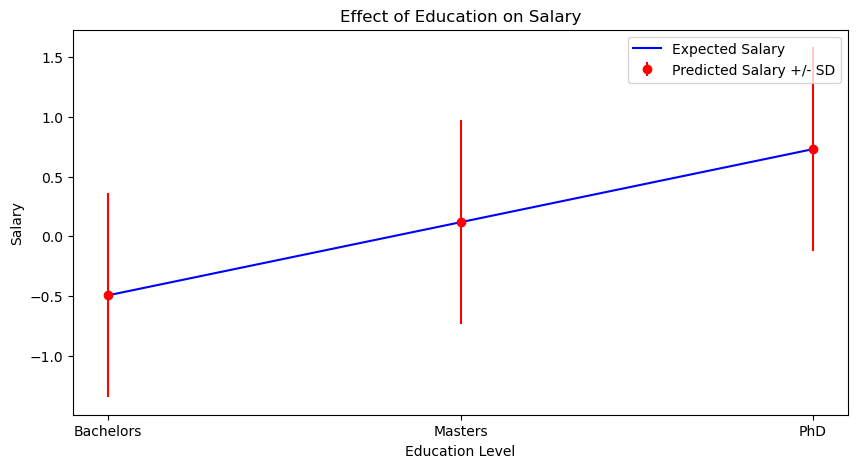

In [35]:
# Extracting the posterior samples
posterior_intercept = -0.494  # mean of the intercept's posterior
posterior_beta_education = 0.612  # mean of the gender's beta posterior
posterior_sigma = 0.854  # mean of the sigma's posterior

# Simulating observations
education_categories = np.array([0, 1, 2])  # Assuming 0 for Bachelors, 1 for Masters, 2 for PhD
salary_expectation = posterior_intercept + posterior_beta_education * education_categories

# Plotting
plt.figure(figsize=(10, 5))

# Plot the regression line for expected salary by education level
sns.lineplot(x=education_categories, y=salary_expectation, color='blue', label='Expected Salary')

# Points for Bachelors (0), Masters (1), and PhD (2) with error bars (using posterior_sigma)
plt.errorbar(education_categories, salary_expectation, yerr=posterior_sigma, fmt='o', color='red', label='Predicted Salary +/- SD')

# Labelling
plt.xticks(ticks=education_categories, labels=['Bachelors', 'Masters', 'PhD'])
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Effect of Education on Salary')
plt.legend()
plt.show()

### Conclusion
The graph displays the following key points:

- The blue line indicates the expected salary increase as the level of education rises from Bachelor's to Master's to PhD, suggesting a positive relationship between education and salary.

- The red vertical lines represent the variability or uncertainty around the predicted salary at each level of education, with the length of the lines likely corresponding to plus or minus one standard deviation from the mean salary prediction.

- The plot is likely based on standardized data, as suggested by the presence of both negative and positive values on the y-axis, which typically results from subtracting the mean and dividing by the standard deviation for each data point.

#### Effect of Years of Experience

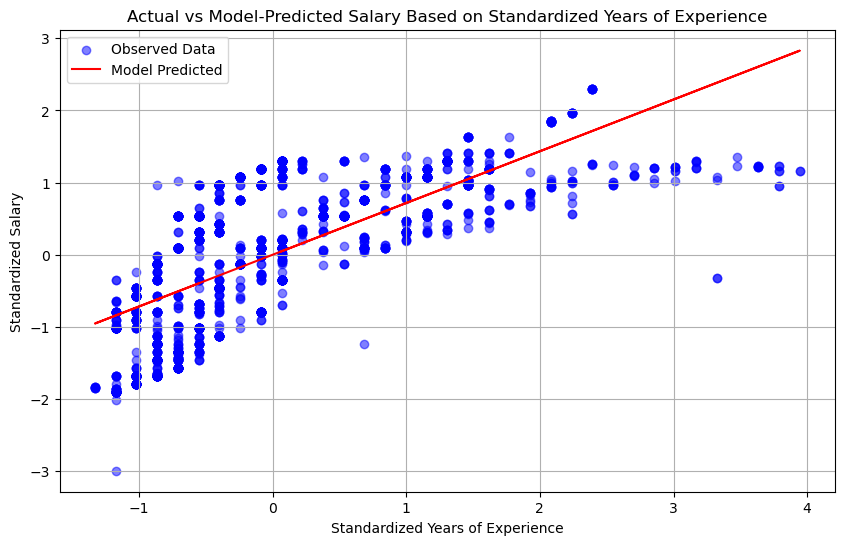

In [36]:
summary = pm.summary(YOE_effect)
intercept_mean = summary.loc['Intercept', 'mean']
beta_experience_mean = summary.loc['Beta_Experience', 'mean']

# Generating the model's predicted mean salary over the standardized range of Years of Experience
mean_salary = intercept_mean + beta_experience_mean * std_YOE

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(std_YOE, std_Sal, c='blue', alpha=0.5, label='Observed Data')
plt.plot(std_YOE, mean_salary, c='red', label='Model Predicted')
plt.xlabel('Standardized Years of Experience')
plt.ylabel('Standardized Salary')
plt.title('Actual vs Model-Predicted Salary Based on Standardized Years of Experience')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion
The regression plot shows the relationship between standardized years of experience and standardized salary, with the following points to consider:

- The positive slope of the regression line indicates a positive relationship between years of experience and salary.
- The spread of data points around the regression line suggests variability in salaries that is not captured solely by years of experience.
- The points that fall far from the regression line could be considered outliers or may indicate the presence of other factors affecting salary beyond years of experience.
- The plot reinforces the Bayesian model results, where the `Beta_Experience` parameter mean is 0.713, confirming the positive relationship seen in the regression line.

#### Effect of Age on Salary

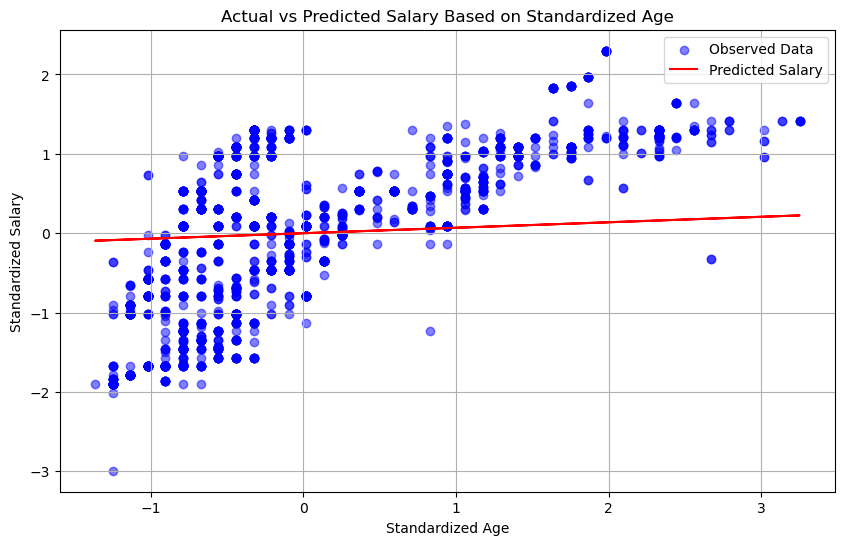

In [37]:
# Extracting the posterior means of the model parameters
summary=pm.summary(Age_effect)
intercept_mean = summary.loc['Intercept', 'mean']
beta_age_mean = summary.loc['Beta_Age', 'mean']

# Calculating the predicted salary using the mean coefficients for each value of std_Age
predicted_salary = intercept_mean + beta_age_mean * std_Age

# Plotting the standardized actual Salary against the standardized Age
plt.figure(figsize=(10, 6))
plt.scatter(std_Age, std_Sal, c='blue', alpha=0.5, label='Observed Data')
plt.plot(std_Age, predicted_salary, c='red', label='Predicted Salary')

plt.xlabel('Standardized Age')
plt.ylabel('Standardized Salary')
plt.title('Actual vs Predicted Salary Based on Standardized Age')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion
- The graph depicts a scatter plot of observed data points representing standardized age against standardized salary, showing a widespread distribution of salaries across different ages.

- A horizontal line representing the predicted salary based on standardized age indicates that the model predicts no significant change in salary as age increases or decreases; the slope of the line appears to be nearly zero.

- There is considerable variability in the actual salaries that is not captured by age alone, as indicated by the spread of the data points above and below the predicted salary line.